<a href="https://colab.research.google.com/github/alexeylazarev13/da_homeworks/blob/main/ml2_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
df = pd.read_csv('/content/drive/MyDrive/GAZP_210801_220806.txt',sep=',')
df.head(5)

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,GAZP,D,20210802,0,287.88,289.48,285.21,286.75,38297270
1,GAZP,D,20210803,0,286.77,288.05,284.34,287.09,27065240
2,GAZP,D,20210804,0,287.89,288.80,286.00,287.94,23599750
3,GAZP,D,20210805,0,287.31,288.28,285.16,285.95,47254880
4,GAZP,D,20210806,0,285.26,285.72,277.87,282.27,90600850


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   <TICKER>  238 non-null    object        
 1   <PER>     238 non-null    object        
 2   <DATE>    238 non-null    datetime64[ns]
 3   <TIME>    238 non-null    int64         
 4   <OPEN>    238 non-null    float64       
 5   <HIGH>    238 non-null    float64       
 6   <LOW>     238 non-null    float64       
 7   <CLOSE>   238 non-null    float64       
 8   <VOL>     238 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 16.9+ KB


**Предсказать CLOSE на 06-08-2022 (Facebook prophet)**

In [ ]:
!pip install prophet

In [29]:
from prophet import Prophet

In [78]:
df['<DATE>'] = pd.to_datetime(df['<DATE>'], format='%Y%m%d')

In [79]:
df.head(3)

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,GAZP,D,2021-08-02,0,287.88,289.48,285.21,286.75,38297270
1,GAZP,D,2021-08-03,0,286.77,288.05,284.34,287.09,27065240
2,GAZP,D,2021-08-04,0,287.89,288.80,286.00,287.94,23599750


In [86]:
df_copy=df[['<DATE>', '<CLOSE>']]

In [87]:
df_copy.head(3)

,<DATE>,<CLOSE>
0,2021-08-02,286.75
1,2021-08-03,287.09
2,2021-08-04,287.94


In [88]:
df_copy.reset_index()

,index,<DATE>,<CLOSE>
0,0,2021-08-02,286.75
1,1,2021-08-03,287.09
2,2,2021-08-04,287.94
3,3,2021-08-05,285.95
4,4,2021-08-06,282.27
...,...,...,...
233,233,2022-08-01,192.00
234,234,2022-08-02,187.16
235,235,2022-08-03,187.04
236,236,2022-08-04,184.90


In [89]:
df_copy.columns = ['ds', 'y']

In [94]:
df_copy.tail(3)

,ds,y
235,2022-08-03,187.04
236,2022-08-04,184.90
237,2022-08-05,176.58


In [ ]:
m = Prophet()
m.fit(df_copy)


In [96]:
future = m.make_future_dataframe(periods=1)
future.tail()

,ds
234,2022-08-02
235,2022-08-03
236,2022-08-04
237,2022-08-05
238,2022-08-06


In [102]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
234,2022-08-02,214.789172,173.718385,252.507683
235,2022-08-03,215.269944,176.283594,253.394819
236,2022-08-04,210.528396,171.629064,250.755258
237,2022-08-05,207.373961,169.845956,247.581553
238,2022-08-06,198.741885,158.424453,237.740064


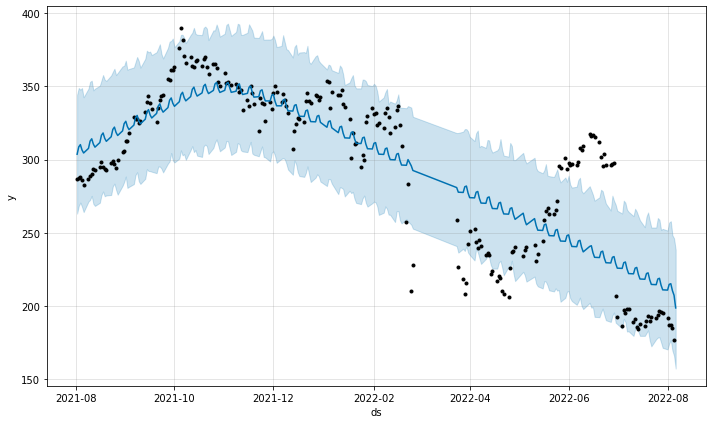

In [98]:
gr = m.plot(forecast)